follow on insta
<a href="https://www.instagram.com/programming_fever/">@programmimg_fever</a>

medium publication
<a href="https://medium.com/programming-fever">programmimg_fever</a>

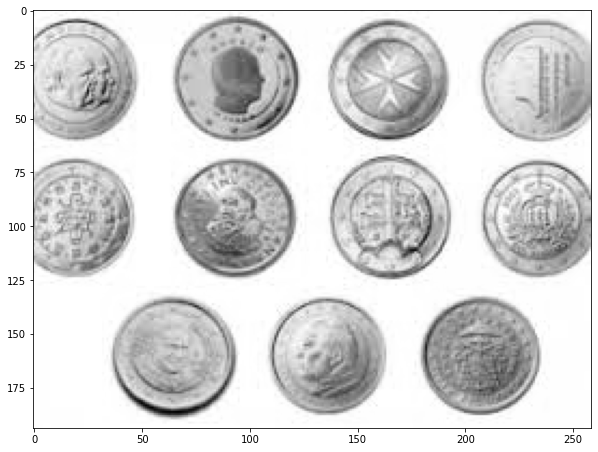

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
image = 'coins.jpg'
img = cv2.imread(image, 1)
img_org = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.rcParams["figure.figsize"] = (10,9)
plt.imshow(img, cmap='gray')

In [2]:
img = cv2.GaussianBlur(img, (5,5),0)
circles_float = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.9, minDist=120, param1=100, param2=50, minRadius=90, maxRadius=220)
circles = np.uint16(np.around(circles_float))
circles = np.squeeze(circles)
circles = circles[ circles[:,0].argsort()]

TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable rint method

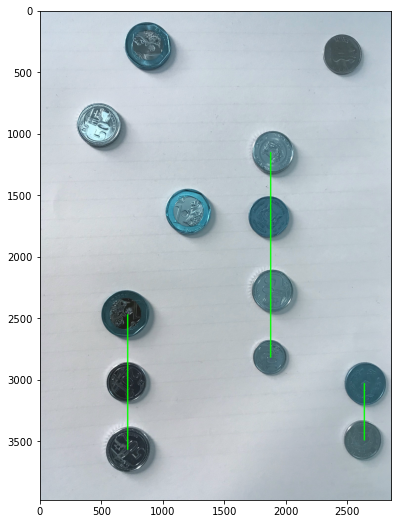

In [7]:
lines = np.empty([0,3] ,dtype=int)

i=0
while(i < circles.shape[0] - 1):
    j=i+1
    b=False
    nxt=1
    min_y = circles[i][1]
    max_y = circles[i][1]
    while(j < circles.shape[0]):
        if(circles[j][0] - circles[i][0] <= 40): #Here the number '40' might vary from image to image
            x1 = circles[i][0]
            if circles[j][1] < min_y:
                min_y = circles[j][1]
            
            x2 = circles[j][0]
            if circles[j][1] > max_y:
                max_y = circles[j][1]
                
            b=True
            nxt+=1
            
        j=j+1
    if b:
        x=int(np.mean([x1,x2]))
        lines = np.append(lines, [[x, min_y, max_y]], axis=0)
    i+=nxt
output = img_org.copy()
for i in range(lines.shape[0]):
    output = cv2.line(output, (lines[i][0],lines[i][1]), (lines[i][0],lines[i][2]), (0,255,0), 10)
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(output)
